# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

# Data Collection

In [2]:
#Loading the Dataset
df = pd.read_csv('FishDataset.csv')
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


# Data Preprocessing

In [3]:
# getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
# checking the Distribution of the DataSet
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [5]:
# checking the number of missing values
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [6]:
# Splitting the Dataset (X and Y)

X = df.drop(['Species','Weight'],axis=1)
Y = df['Weight']

In [7]:
# Displaying the Features (X)
X

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936
155,11.7,12.4,13.5,2.4300,1.2690
156,12.1,13.0,13.8,2.2770,1.2558
157,13.2,14.3,15.2,2.8728,2.0672


In [8]:
# Displaying the Target (Y)
Y

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

In [9]:
# Splitting the data into : Train(80%)  & Test(20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=30)

In [10]:
print("Shape of X_train : ",X_train.shape)
print("Shape of Y_train : ",Y_train.shape)
print("Shape of X_test : ",X_test.shape)
print("Shape of Y_test : ",Y_test.shape)

Shape of X_train :  (127, 5)
Shape of Y_train :  (127,)
Shape of X_test :  (32, 5)
Shape of Y_test :  (32,)


# Training the Model via Linear Regression :

In [11]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [12]:
# training the model
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

# Model Evaluation

In [13]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)
training_data_prediction

array([1075.9073867 ,  371.67136592,  703.97720639, -188.73896628,
        559.51416459,  131.40778334,  872.92855835,  -90.18117471,
       -151.68559574,  109.61373459,  436.77495029,  702.50818206,
        205.84356567,  711.47748841, -173.33240845,  679.14439168,
        595.50677274, -168.6240324 ,  803.53244701, -168.77283392,
        237.17301197, -153.5554283 ,  130.85712002,  266.65328344,
        173.24023539,  499.83223872,  811.76927439,  381.24324291,
        371.56145597,  169.35519963,  -34.99154742,  688.86140774,
        211.94920147,  -83.5564157 ,  266.44488839,  289.22125738,
        808.85597279,  163.80547123,  646.38780178,  821.14305195,
         54.71527319,  628.42393762, 1131.91156139,  217.33320483,
        419.28627787,  -79.75690669,  172.66509815,  512.84276894,
        611.39339058,  239.34204961,  542.82816432,  379.63320003,
        436.80559741,  721.72335648,  813.15278296,  784.92707804,
        830.57510857,  616.52595056,  298.48427599,  131.65161

In [14]:
# prediction on Test data
test_data_prediction = lin_reg_model.predict(X_test)
test_data_prediction

array([-123.84940795, -149.52021313,  363.79494862,  521.81220984,
        682.02261428,  677.41063447,  469.94952012, -240.86570659,
        271.74026037,  449.11396959,  569.84574873,  877.07192603,
        236.28839376,  640.9456383 ,  156.39729961,  126.4634983 ,
        164.8187675 ,   86.17392679,  903.27516197,  376.67530997,
        137.70876828,  114.4737211 ,   94.3918066 ,  927.13030554,
        681.80400443,  873.05257178,  333.95176218,  400.34701533,
       1226.51215741,  268.52927659,  767.17268382,  433.3182768 ])

In [15]:
# R squared Error 

error_score1 = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error (Train Data) : ", error_score1*100,'%')

print("--------------------------------")

error_score2 = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error (Test Data) : ", error_score2*100,'%')

R squared Error (Train Data) :  88.30211981115336 %
--------------------------------
R squared Error (Test Data) :  88.63577634436615 %


# Retraining the Model for improving Accuraccy :

In [16]:
# checking corelation of Features...
df_corr = df.corr()
df_corr

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


In [17]:
df_corr['Weight'].sort_values(ascending=False)

Weight     1.000000
Length3    0.923044
Length2    0.918618
Length1    0.915712
Width      0.886507
Height     0.724345
Name: Weight, dtype: float64

### Changing Random State for Best Fit

In [18]:
ts = range(2000)
scores = []
for i in ts:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=i)
    lin_reg_model.fit(X_train,Y_train)
    test_data_prediction = lin_reg_model.predict(X_test)
    error_score = metrics.r2_score(Y_test, test_data_prediction)
    scores.append(error_score)

In [19]:
scores

[0.8632643733814437,
 0.8704220588719107,
 0.8215204504675143,
 0.8618902278320013,
 0.8929505570071191,
 0.8622620375151069,
 0.862674348504698,
 0.8638221245135627,
 0.904539763022831,
 0.8501002225832648,
 0.7101165176804292,
 0.829164191780553,
 0.8529166929613035,
 0.8669959432180331,
 0.8806223873122025,
 0.8829240455496741,
 0.832245848467295,
 0.9195786719063466,
 0.8821905346827956,
 0.8540330050320498,
 0.8817916673760918,
 0.8010862077150553,
 0.8274746893792317,
 0.8332247372527035,
 0.834481327767963,
 0.9400086678556975,
 0.8467633244092362,
 0.8037508086872551,
 0.8500037575788889,
 0.8582101713799644,
 0.8863577634436615,
 0.8266171876841499,
 0.852552074002816,
 0.7883214028030452,
 0.8597916530940648,
 0.8840351414832867,
 0.8866720716321699,
 0.7939241436609744,
 0.7966925572887342,
 0.858448708145535,
 0.8679594534557272,
 0.8169406688272538,
 0.8821430593048694,
 0.9099535087495281,
 0.8931899550057018,
 0.8558877131534091,
 0.8831776117949737,
 0.8272171071448884,

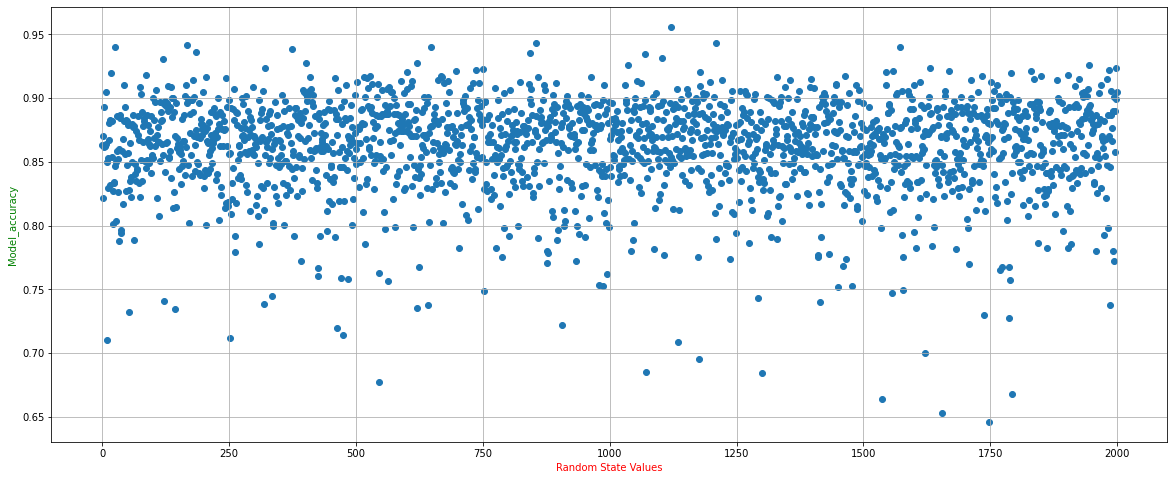

In [20]:
# plotting the scores

plt.figure(figsize=(20,8))
plt.xlabel('Random State Values',color='red')
plt.ylabel('Model_accuracy',color='green')
plt.scatter(ts, scores)
plt.grid()
plt.show()

In [21]:
x = max(scores)
print(x)
index = scores.index(x)
print("Required Random State = ",index)

0.95601950488825
Required Random State =  1120


In [22]:
scores[index]

0.95601950488825

### Retraining the Model :

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=index)
lin_reg_model.fit(X_train,Y_train)
test_data_prediction = lin_reg_model.predict(X_test)
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("After revaluation -> Accuraccy = ", error_score*100, "%")

After revaluation -> Accuraccy =  95.60195048882501 %


In [24]:
# Saving the Trained Model
import pickle
filename = 'Fish_Weight_Prediction_LinearRegression.train'
pickle.dump(lin_reg_model, open(filename,'wb'))

#loading the saved model
#loadMODEL = pickle.load(open('Fish_Weight_Prediction_LinearRegression.train','rb')) 

# Visualising the Actual and Predicted Weights

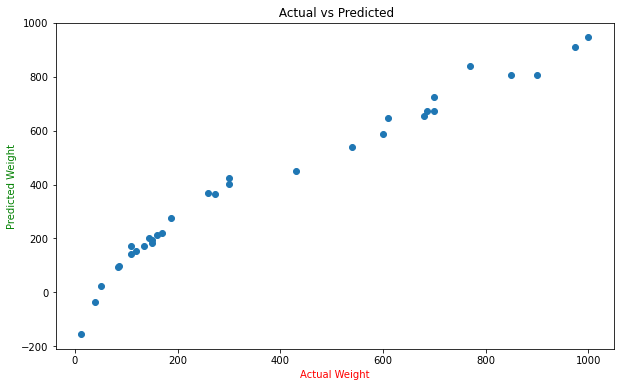

In [25]:
# on test data
plt.figure(figsize=(10,6))
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Weight",color='red')
plt.ylabel("Predicted Weight",color='green')
plt.title(" Actual vs Predicted")
plt.show()

# Building a Predictive System... 

In [26]:
length1 = eval(input("Enter Length of Left_Fin : "))
length2 = eval(input("Enter Length of Right_Fin : "))
length3 = eval(input("Enter Length of Tail : "))
height = eval(input("Enter Height of Fish : "))
width = eval(input("Enter Width of Fish : "))

input_data = (length1,length2,length3,height,width)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction1 = lin_reg_model.predict(input_data_reshaped)
print("-------------------------------")
print("Predicted Weight of Fish = ",prediction1[0])


Enter Length of Left_Fin : 24
Enter Length of Right_Fin : 26.3
Enter Length of Tail : 31.2
Enter Height of Fish : 55
Enter Width of Fish : 44
-------------------------------
Predicted Weight of Fish =  2412.1230752586875
